# Overview of ClassifierAnalysis class

Let's have a quick overview on the ClassifierAnalysis object. The main goal is like is name say : to analyse a classifier, show performance of the model or compare performance if we change the threshold.

## Load packages

In [10]:
import MLHelper
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Load data

In [11]:
train = pd.read_csv("titanic/train.csv")

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Prepare data

In [13]:
train = train.drop(['Cabin'], axis = 1)
train = train.drop(['Ticket'], axis = 1)
train = train.fillna({"Embarked": "S"})
train = train.drop(['Name'], axis = 1)

sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)

embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)

train = train.fillna(0)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,1


## Create model

In [15]:
target = 'Survived'
y = train[target]
X = train.copy()
del X[target]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
clf = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Use of ClassifierAnalysis

First we need to create the object. Then, you can execute `set_y_true` function to set the real target variable and since you have the model already set we need to compute the predictions with `compute_prediction` function.

In [24]:
clf_analysis = MLHelper.ClassifierAnalysis(clf)
clf_analysis.set_y_true(y_test)
clf_analysis.compute_prediction(X_test)

## Overall model performance

#### Accuracy of the model :

0.8101694915254237


#### F1 score of the model :

0.743119266055046


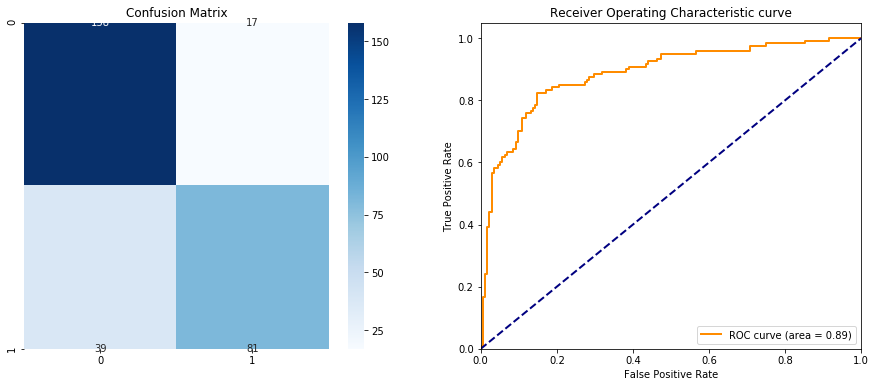

In [25]:
clf_analysis.show_performance()

/home/lauga/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Proba threshold comparison for accuracy, f1 score, precision & recall

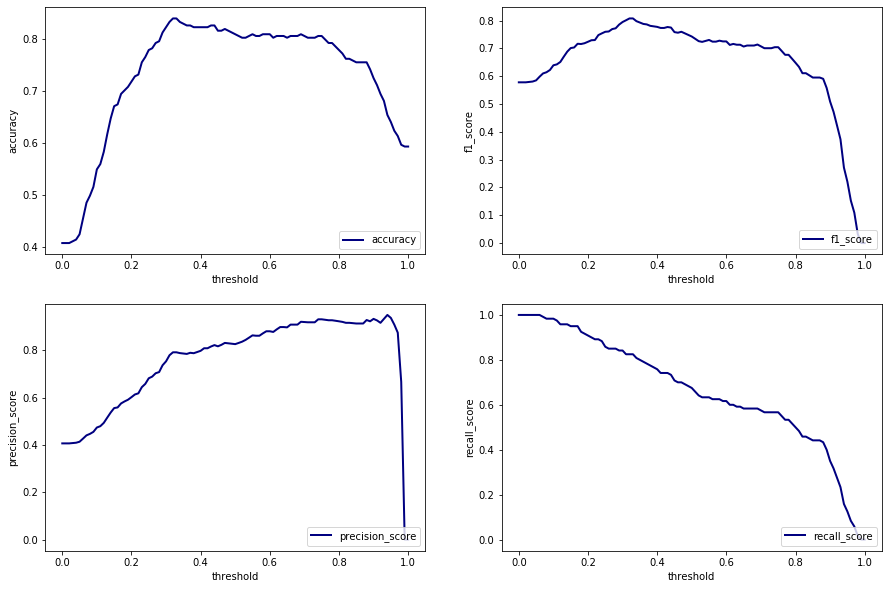

In [26]:
clf_analysis.compute_threshold_prediction(X_test, start=0, end=1, step=0.01)
clf_analysis.compare_threshold_predictions()

## The end

Thanks for reading!

*Nathan*